# Perform participant exclusion

In [1]:
# Install Black autoformatter with: pip install nb-black
%load_ext lab_black

import pandas as pd
import numpy as np

# plotting
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 14})

In [2]:
def participant_exclusion(df):

    # remove food column
    df = df.drop(["food"], axis=1)

    if "logk_fcq" in df.columns:
        exclude = (df.logk_fcq < -3.5) | (df.logk_fcq > -0.5)
        df.loc[exclude, "logk_fcq"] = np.nan
        print(f"{sum(exclude)} FCQ scores set to missing based on senstive range")

    if "logk_mcq" in df.columns:
        exclude = (df.logk_mcq < -8.5) | (df.logk_mcq > -1.5)
        df.loc[exclude, "logk_mcq"] = np.nan
        print(f"{sum(exclude)} MCQ scores set to missing based senstive range")

    if "logk_wcq" in df.columns:
        exclude = (df.logk_wcq < -5.0) | (df.logk_wcq > 0.5)
        df.loc[exclude, "logk_wcq"] = np.nan
        print(f"{sum(exclude)} WCQ scores set to missing based senstive range")

    exclude = df.age < 18
    df = df.drop(df[exclude].index)
    print(f"{sum(exclude)} participant[s] removed being under 18")

    exclude = (df.height_meters < 1.25) | (df.height_meters > 2.0)
    df = df.drop(df[exclude].index)
    print(f"{sum(exclude)} participant[s] removed based on height")

    exclude = (df.weight_kg < 35) | (df.weight_kg > 150)
    df = df.drop(df[exclude].index)
    print(f"{sum(exclude)} participant[s] removed based on weight")

    exclude = (df.waist_meters < 0.6) | (df.waist_meters > 1.5)
    df = df.drop(df[exclude].index)
    print(f"{sum(exclude)} participant[s] removed based on waist")

    print(f"Results in a total of {df.shape[0]} participants")

    return df

## Do the exclusion

In [3]:
study1 = pd.read_csv("../03 scored data/study1_final_data.csv")
study1 = participant_exclusion(study1)
study1.to_csv("study1_final_data.csv", index=False)

print("\nTotal non missing values:")
study1.notnull().sum()

155 FCQ scores set to missing based on senstive range
27 MCQ scores set to missing based senstive range
1 participant[s] removed being under 18
2 participant[s] removed based on height
1 participant[s] removed based on weight
28 participant[s] removed based on waist
Results in a total of 384 participants

Total non missing values:


URN                  384
consent              384
age                  384
sex                  383
height_meters        378
weight_kg            372
waist_meters         321
BMI                  372
log_WHtR             321
subjective_hunger    384
logk_mcq             358
logk_fcq             239
dtype: int64

In [4]:
study2 = pd.read_csv("../03 scored data/study2_final_data.csv")
study2 = participant_exclusion(study2)
study2.to_csv("study2_final_data.csv", index=False)

print("\nTotal non missing values:")
study2.notnull().sum()

181 FCQ scores set to missing based on senstive range
165 WCQ scores set to missing based senstive range
1 participant[s] removed being under 18
4 participant[s] removed based on height
4 participant[s] removed based on weight
30 participant[s] removed based on waist
Results in a total of 401 participants

Total non missing values:


URN                  401
age                  401
sex                  400
height_meters        400
weight_kg            393
waist_meters         338
BMI                  393
log_WHtR             338
subjective_hunger    401
logk_fcq             234
logk_wcq             253
dtype: int64

## Plot the distributions

In [5]:
import matplotlib.pyplot as plt

In [6]:
var_names = ["age", "height_meters", "weight_kg", "waist_meters", "BMI", "log_WHtR"]


Study 1
age


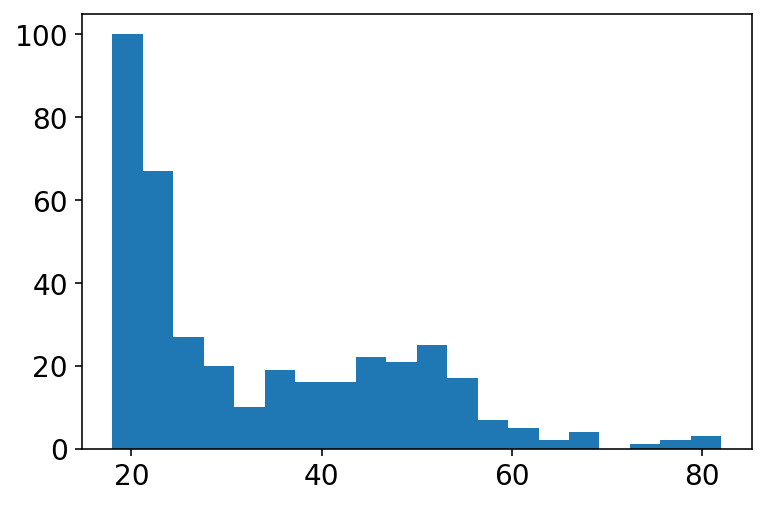

height_meters


/Users/benjamv/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/benjamv/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


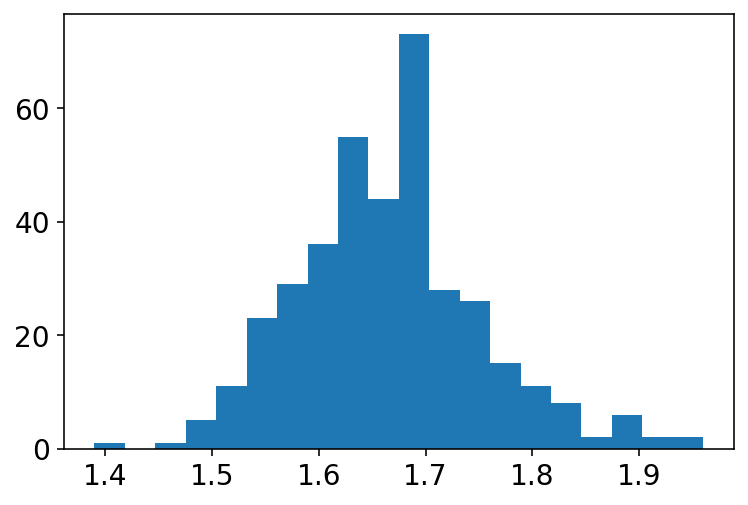

weight_kg


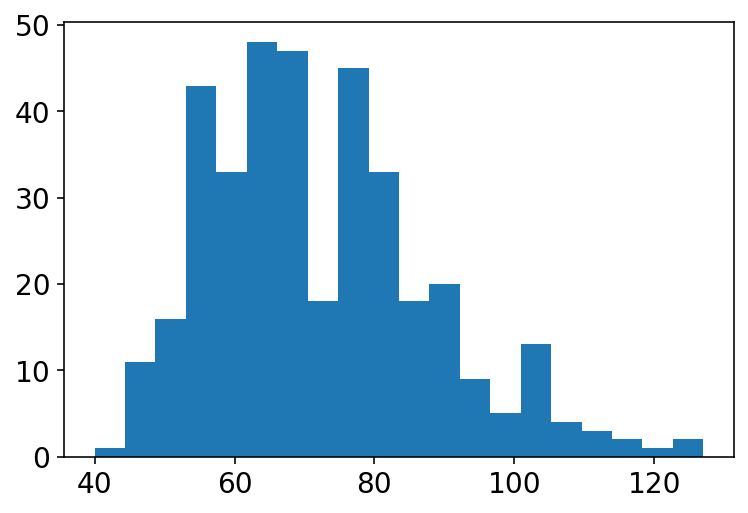

waist_meters


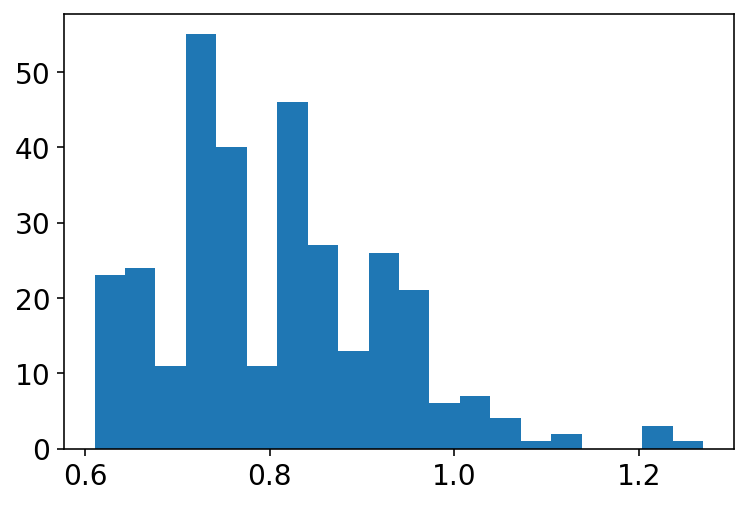

BMI


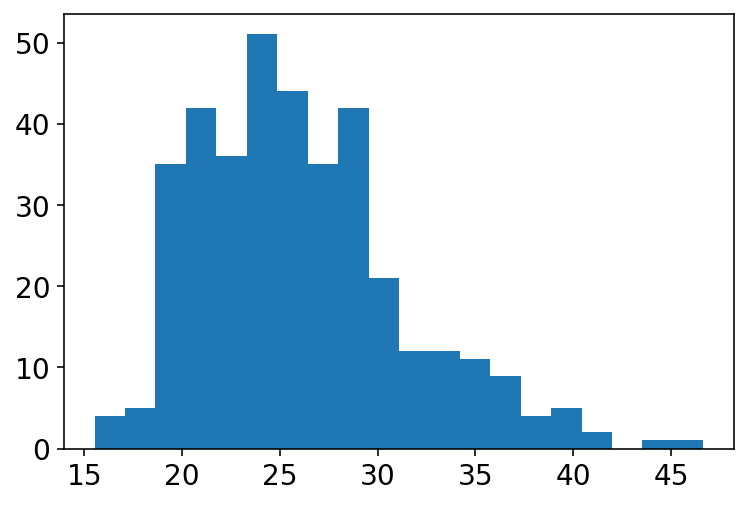

log_WHtR


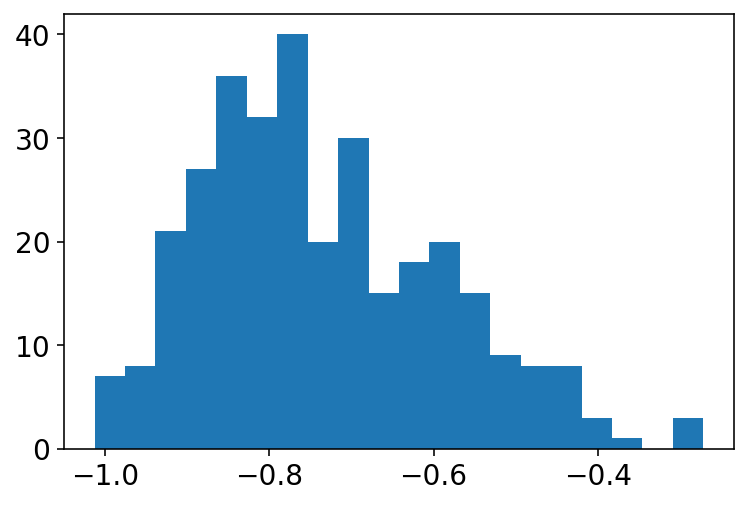


Study 2
age


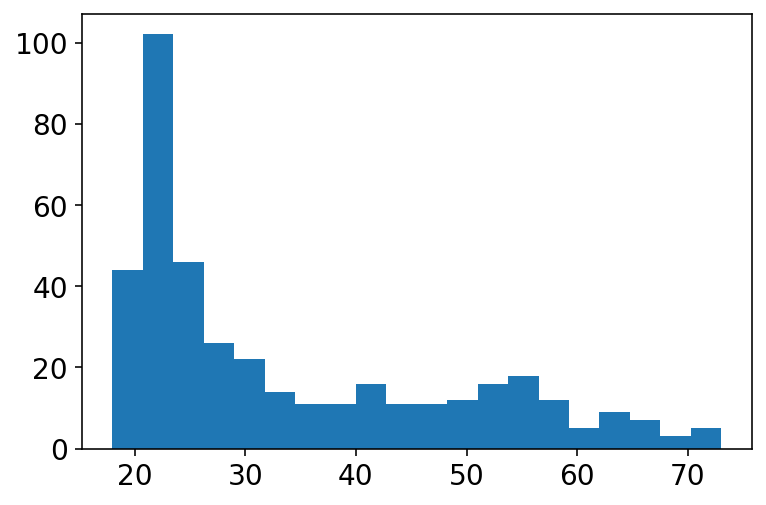

height_meters


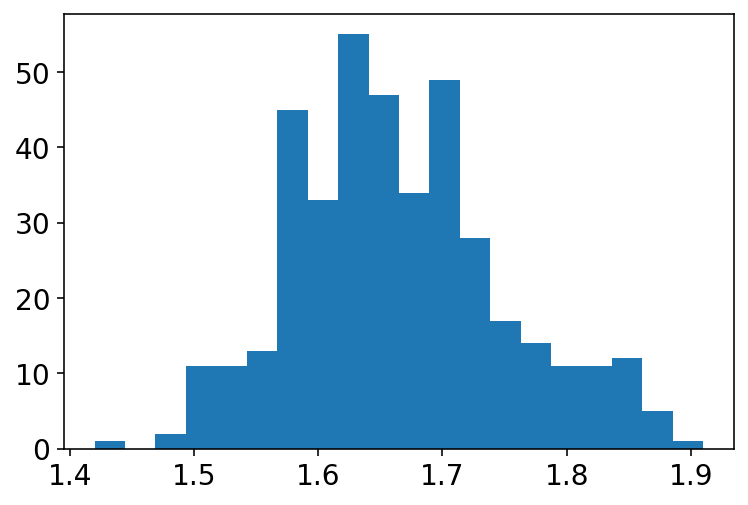

weight_kg


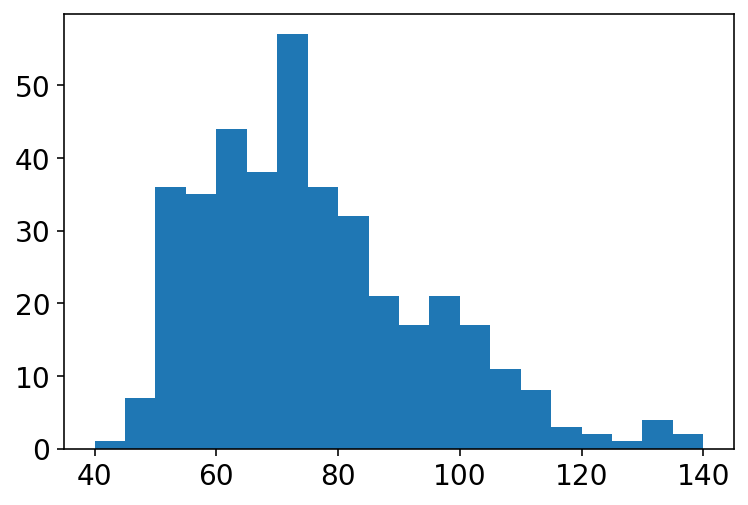

waist_meters


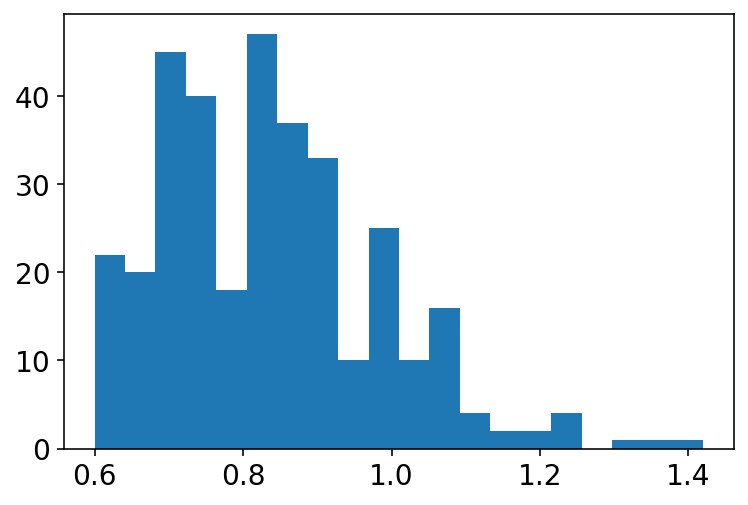

BMI


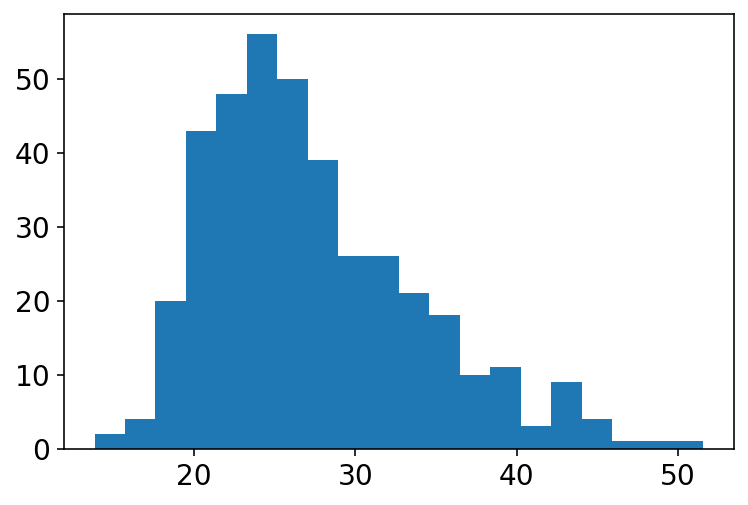

log_WHtR


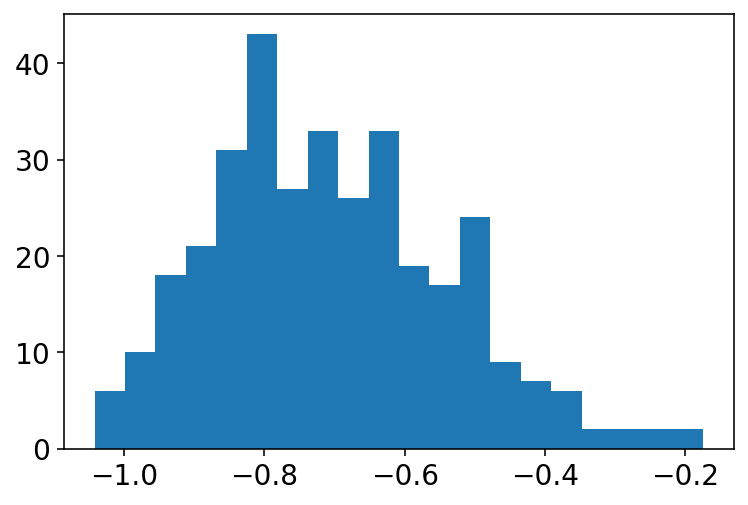

In [7]:
for study, data in enumerate([study1, study2]):
    print(f"\nStudy {study+1}")
    for var_name in var_names:
        fig, ax = plt.subplots(figsize=(6, 4))
        print(var_name)
        ax.hist(data[var_name].values, 20)
        plt.show()